# Travel tips for travellers on short term for exploring Seoul  

## Importing the Necessary Libraries 

In [15]:

import pandas as pd
import locale
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import json
from math import sin, cos, sqrt, atan2, radians
from sklearn.cluster import KMeans
import matplotlib.path as mpltPath

locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:

!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ------------------------------------------------------------
                       

### Inserting the coordinates of Seoul 

In [25]:
# co-ordinates of Seoul
latitude = '37.5665'
longitude = '126.9780'

## Foursquare API  Details 

In [26]:
CLIENT_ID = 'V35EBXAKYS30PGOMD5IZAFMUF0FHK35DPYCZDJQ2R1F1DKT3' # your Foursquare ID
CLIENT_SECRET = 'N53YCLOV1BD1ABGWQPBQNT3TZEM5UABWEXJVIEQS2XG1K4XN' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version

## Getting Recommended popular places in Seoul 

In [27]:
LIMIT = 100
radius=500
def getRecommended(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius,
#             category,
            LIMIT)
    results = requests.get(url).json()["response"]["groups"][0]['items']
    Recommended_list = []
    for v in results:
            Recommended_list.append([( 
            v['venue']['name'],
            v['venue']['location']['formattedAddress'][0],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name'])])
            
        
    Recommended = pd.DataFrame([item for venue in Recommended_list for item in venue])
    Recommended.columns = [ 
                  'VenueName', 
                   'Address',
                  'Latitude', 
                  'Longitude', 
                  'SubCategory']
    return(Recommended)
recommended = getRecommended(latitude,longitude)

In [28]:
recommended.head()

,VenueName,Address,Latitude,Longitude,SubCategory
0,Joo Ok (주옥),중구 소공로 119 플라자호텔 3층,37.564705,126.977667,Korean Restaurant
1,Läderach chocolatier suisse (레더라),중구 세종대로 136 (SFC점),37.568153,126.978265,Chocolate Shop
2,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza
3,무교동북어국집,중구 을지로1길 38,37.567852,126.979753,Korean Restaurant
4,Jeonggwanheon (덕수궁 정관헌),중구 세종대로 99,37.566363,126.975810,Historic Site


## Getting all the venues in Seoul 

In [29]:
LIMIT = 500
radius=1000
def getVenues(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius,
#             category,
            LIMIT)
    results = requests.get(url).json()["response"]["venues"]
    Venue_list = []
    for v in results:
            if v['categories'] != []:
                Venue_list.append([( 
                v['name'],
                v['location']['formattedAddress'][0],
                v['location']['lat'], 
                v['location']['lng'],
                v['categories'][0]['name'])])
    Venue = pd.DataFrame([item for venue in Venue_list for item in venue])
    Venue.columns = [ 
                  'VenueName', 
                    'Address',
                  'Latitude', 
                  'Longitude',
                  'SubCategory']
    return(Venue)
venues = getVenues(latitude,longitude)

In [24]:
venues

,VenueName,Address,Latitude,Longitude,SubCategory
0,Seoul Citizens Hall (시민청),중구 세종대로 110,37.566718,126.977735,City Hall
1,Seoul Metropolitan Library (서울도서관),중구 세종대로 110 (옛 시청사),37.566196,126.977920,Library
2,Seoul City Hall (서울특별시청),세종대로 110,37.566643,126.978357,City Hall
3,서울시청 시민청 태평홀,중구 세종대로 110 B2F,37.566716,126.977783,Auditorium
4,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza
5,시민청갤러리,중구 세종대로 110,37.566632,126.978019,Art Gallery
6,프레스클럽,중구 세종대로 124,37.566529,126.977538,Chinese Restaurant
7,서울시청 신청사 다목적홀,중구 세종대로 110,37.566564,126.977945,Auditorium
8,서울시청 신청사 구내식당,중구 세종대로 110,37.566704,126.977825,Cafeteria
9,Jongno 3(sam)-ga Stn. (종로3가역),"종로구 종로 지하 129 (1호선, 3호선, 5호선)",37.572555,126.991741,Metro Station


In [22]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
VenueName      114 non-null object
Address        114 non-null object
Latitude       114 non-null float64
Longitude      114 non-null float64
SubCategory    114 non-null object
dtypes: float64(2), object(3)
memory usage: 4.5+ KB


## Segregating data into Parent Categories  like Restaurant, cafe, coffeeshop

In [30]:
def giveCategory(self):
    self.replace('Café','Cafe')
    if 'Restaurant' in  self:
        return 'Restaurant'
    elif self == 'Coffee Shop':
        return 'Cafe'
    elif self == 'Café':
        return 'Cafe'
    else:
        return self
recommended['Category'] = recommended['SubCategory'].apply(giveCategory)
venues['Category'] = venues['SubCategory'].apply(giveCategory)

### Clustering the segregated data based on their Latitude and Longitude 

In [31]:

kclusters = 5

cluster = recommended[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster)
recommended['Cluster Labels'] = kmeans.labels_
recommended.head()

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Joo Ok (주옥),중구 소공로 119 플라자호텔 3층,37.564705,126.977667,Korean Restaurant,Restaurant,3
1,Läderach chocolatier suisse (레더라),중구 세종대로 136 (SFC점),37.568153,126.978265,Chocolate Shop,Chocolate Shop,0
2,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza,Pedestrian Plaza,3
3,무교동북어국집,중구 을지로1길 38,37.567852,126.979753,Korean Restaurant,Restaurant,4
4,Jeonggwanheon (덕수궁 정관헌),중구 세종대로 99,37.566363,126.975810,Historic Site,Historic Site,2


In [32]:
recommended.shape

(100, 7)

In [33]:
kclusters = 5
cluster = venues[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster)
venues['Cluster Labels'] = kmeans.labels_
venues.head()

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Seoul Citizens Hall (시민청),중구 세종대로 110,37.566718,126.977735,City Hall,City Hall,0
1,서울시청 시민청 태평홀,중구 세종대로 110 B2F,37.566716,126.977783,Auditorium,Auditorium,0
2,서울시청 신청사 구내식당,중구 세종대로 110,37.566704,126.977825,Cafeteria,Cafeteria,0
3,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza,Pedestrian Plaza,2
4,Seoul Metropolitan Library (서울도서관),중구 세종대로 110 (옛 시청사),37.566196,126.977920,Library,Library,2


In [34]:
venues['Cluster Labels'].value_counts()

0    62
2    48
4    2 
3    1 
1    1 
Name: Cluster Labels, dtype: int64

## Plot to find the most number of venues and recommended venues in cluster

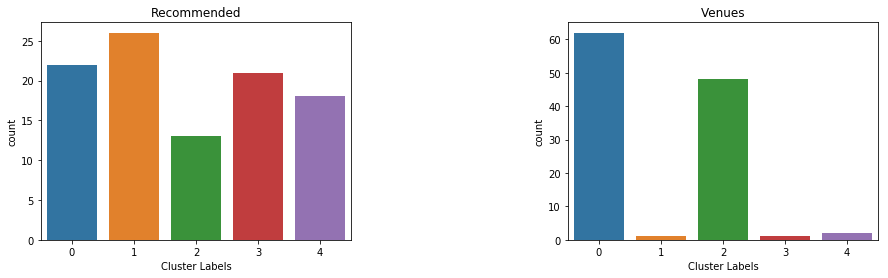

In [35]:
plt.figure(1,figsize=(15,4))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(121)
a.set_title('Recommended')
sns.countplot(recommended['Cluster Labels'])

a = plt.subplot(122)
a.set_title('Venues')
sns.countplot(venues['Cluster Labels'])

plt.show()

#### From the plot we can see that cluster 1 has the most number of recommended venues and cluster 0 has the most number of venues.

## Segmenting Recommended venues based on restaurants, cafe, hotels and lounges

#### This segmentation will help travellers find recommended restaurants, cafes, hotels and lounges easily while on a short trip 

In [36]:
recommended_restaurant = recommended[recommended['Category'] == 'Restaurant'].reset_index(drop = True)
recommended_cafe = recommended[recommended['Category'] == 'Cafe'].reset_index(drop = True)
recommended_hotel = recommended[recommended['Category'] == 'Hotel'].reset_index(drop = True)
recommended_lounge = recommended[recommended['Category'] == 'Lounge'].reset_index(drop = True)


## Plotting to show the recommended venus across different Clusters 

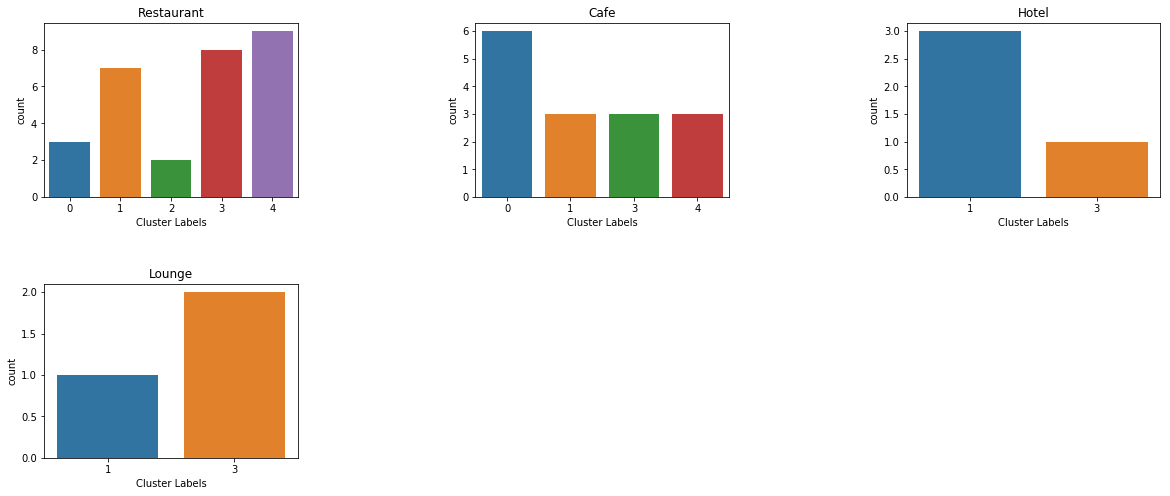

In [37]:
plt.figure(1,figsize=(20,8))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(231)
a.set_title('Restaurant')
sns.countplot(recommended_restaurant['Cluster Labels'])

a = plt.subplot(232)
a.set_title('Cafe')
sns.countplot(recommended_cafe['Cluster Labels'])

a = plt.subplot(233)
a.set_title('Hotel')
sns.countplot(recommended_hotel['Cluster Labels'])

a = plt.subplot(234)
a.set_title('Lounge')
sns.countplot(recommended_lounge['Cluster Labels'])

plt.show()

### From the plots we can visualize there are more recommended restaurants in Cluster 4, more cafes in Cluster 0, more hotels in Cluster 1 and more lounges in  Cluster 3.

In [43]:
recommended_restaurant

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Joo Ok (주옥),중구 소공로 119 플라자호텔 3층,37.564705,126.977667,Korean Restaurant,Restaurant,3
1,무교동북어국집,중구 을지로1길 38,37.567852,126.979753,Korean Restaurant,Restaurant,4
2,Sushi Cho (스시 조),중구 소공로 106,37.564491,126.979743,Sushi Restaurant,Restaurant,1
3,열빈,중구 세종대로21길 22 (광화문점),37.567522,126.976187,Chinese Restaurant,Restaurant,0
4,철철복집,중구 을지로3길 29,37.567393,126.981310,Seafood Restaurant,Restaurant,4
5,구이구이,중구 을지로 192-11 (시청점),37.565581,126.978756,Japanese Restaurant,Restaurant,1
6,리북손만두,중구 무교로 17-13,37.567344,126.978493,Korean Restaurant,Restaurant,0
7,이나니와요스케 (稲庭養助) (이나니와요스케),중구 을지로 6 (시청점),37.565344,126.978727,Japanese Restaurant,Restaurant,1
8,광화문국밥,중구 세종대로21길 53,37.569020,126.975582,Gukbap Restaurant,Restaurant,0
9,忠記麵家 (청키면가),중구 다동길 33 (무교점),37.567899,126.981008,Chinese Restaurant,Restaurant,4


In [44]:
recommended_cafe

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Be-Up Coffee (비읍커피),중구 남대문로9길 52,37.566975,126.979706,Café,Cafe,4
1,Café MAMAS (카페마마스),중구 무교로 16 (시청점),37.567216,126.979188,Café,Cafe,4
2,Paul Bassett (폴바셋),중구 세종대로 135 (코리아나호텔점),37.568019,126.976677,Coffee Shop,Cafe,0
3,Starbucks (스타벅스),중구 을지로 19 (시청플러스점),37.566137,126.979735,Coffee Shop,Cafe,1
4,Starbucks Reserve (스타벅스 리저브),중구 소공로 112 (소공동점),37.564463,126.979025,Coffee Shop,Cafe,1
5,Starbucks (스타벅스),중구 무교로 21 (무교동점),37.568006,126.978947,Coffee Shop,Cafe,0
6,Starbucks (스타벅스),중구 세종대로18길 32 (소공로북창점),37.564000,126.978832,Coffee Shop,Cafe,3
7,Paul Bassett (폴바셋),종로구 종로3길 17 (디타워점),37.570404,126.978832,Coffee Shop,Cafe,0
8,Starbucks (스타벅스),종로구 종로3길 17 (광화문디타워점),37.570267,126.978990,Coffee Shop,Cafe,0
9,Starbucks (스타벅스),중구 남대문로7길 19 (소공로점),37.564040,126.980727,Coffee Shop,Cafe,1


In [45]:
recommended_hotel

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,The Plaza Hotel (더 플라자),중구 소공로 119,37.564621,126.978060,Hotel,Hotel,3
1,Lotte Hotel Seoul (롯데호텔 서울),중구 남대문로 81,37.565722,126.981009,Hotel,Hotel,1
2,The Westin Chosun Seoul (웨스틴조선호텔),중구 소공로 106,37.564378,126.980058,Hotel,Hotel,1
3,Crown Park Hotel,소공동,37.563947,126.980645,Hotel,Hotel,1


In [46]:
recommended_lounge

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,THE LOUNGE,중구 소공로 119,37.565270,126.977918,Lounge,Lounge,3
1,The Plaza Hotel Club Lounge (더 플라자 클럽라운지 18층),소공동,37.564751,126.977944,Lounge,Lounge,3
2,Lounge & Bar (라운지 & 바),중구 소공로 106,37.564590,126.979290,Lounge,Lounge,1


In [39]:
recommended_Cluster_0 = recommended[recommended['Cluster Labels'] == 0].reset_index(drop = True)
recommended_Cluster_1 = recommended[recommended['Cluster Labels'] == 1].reset_index(drop = True)
recommended_Cluster_2 = recommended[recommended['Cluster Labels'] == 2].reset_index(drop = True)
recommended_Cluster_3 = recommended[recommended['Cluster Labels'] == 3].reset_index(drop = True)
recommended_Cluster_4 = recommended[recommended['Cluster Labels'] == 4].reset_index(drop = True)

## Plots to visualize recommended places to visit in each cluster 

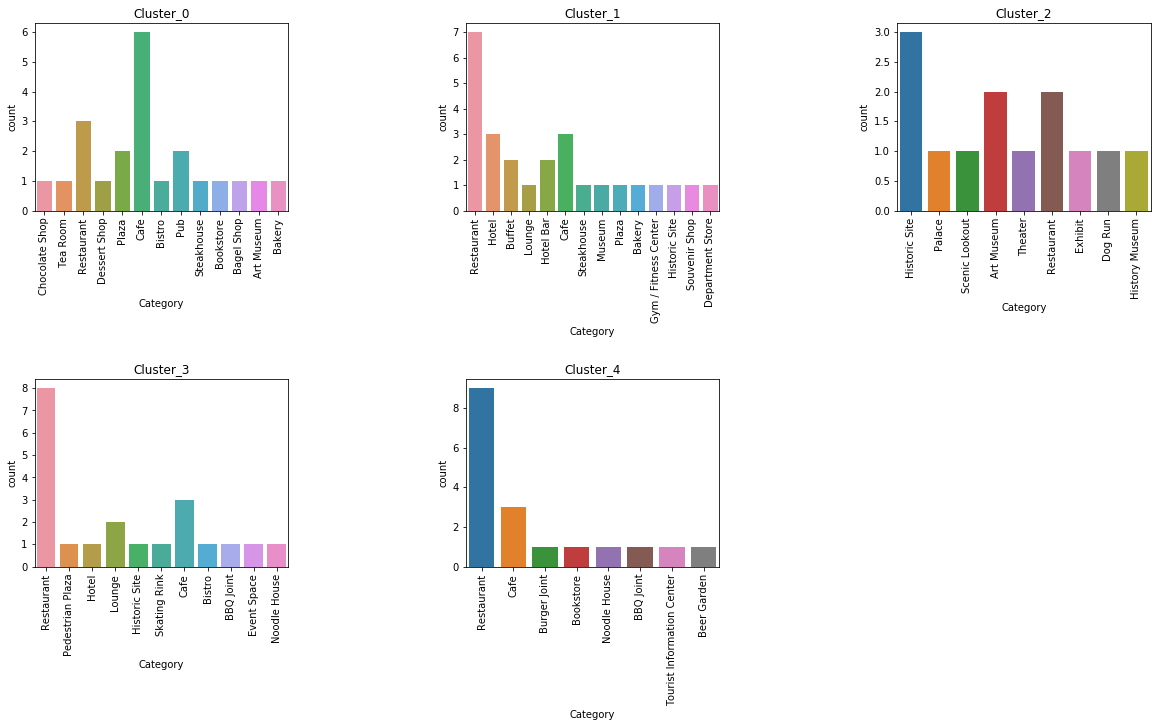

In [40]:
plt.figure(1,figsize=(20,10))

plt.subplots_adjust(hspace=0.9, wspace=0.7)

a = plt.subplot(231)
a.set_title('Cluster_0')
sns.countplot(recommended_Cluster_0['Category'])
plt.xticks(rotation=90)

a = plt.subplot(232)
a.set_title('Cluster_1')
sns.countplot(recommended_Cluster_1['Category'])
plt.xticks(rotation=90)

a = plt.subplot(233)
a.set_title('Cluster_2')
sns.countplot(recommended_Cluster_2['Category'])
plt.xticks(rotation=90)

a = plt.subplot(234)
a.set_title('Cluster_3')
sns.countplot(recommended_Cluster_3['Category'])
plt.xticks(rotation=90)

a = plt.subplot(235)
a.set_title('Cluster_4')
sns.countplot(recommended_Cluster_4['Category'])

plt.xticks(rotation=90)
plt.show()

We can see Cluster 2 has most recommended venues followed by Cluster 0 and Cluster 1.

## Segregating all venues based on clusters 

In [41]:

recommended_Cluster_0

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Läderach chocolatier suisse (레더라),중구 세종대로 136 (SFC점),37.568153,126.978265,Chocolate Shop,Chocolate Shop,0
1,DAMMANN FRÈRES,중구 세종대로 136 B1 (SFC점),37.568307,126.977803,Tea Room,Tea Room,0
2,열빈,중구 세종대로21길 22 (광화문점),37.567522,126.976187,Chinese Restaurant,Restaurant,0
3,HôTEL DOUCE (오뗄두스),중구 세종대로 136,37.568247,126.978006,Dessert Shop,Dessert Shop,0
4,Cheonggye Plaza (청계광장),종로구 청계천로,37.569202,126.977825,Plaza,Plaza,0
5,Paul Bassett (폴바셋),중구 세종대로 135 (코리아나호텔점),37.568019,126.976677,Coffee Shop,Cafe,0
6,리북손만두,중구 무교로 17-13,37.567344,126.978493,Korean Restaurant,Restaurant,0
7,Gwnaghwamun Mong-ro (광화문 몽로),중구 세종대로21길 40,37.568577,126.975905,Bistro,Bistro,0
8,광화문국밥,중구 세종대로21길 53,37.569020,126.975582,Gukbap Restaurant,Restaurant,0
9,Wolhyang (월향),중구 세종대로21길 30 (광화문점),37.567916,126.975665,Pub,Pub,0


In [42]:
recommended_Cluster_1

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Sushi Cho (스시 조),중구 소공로 106,37.564491,126.979743,Sushi Restaurant,Restaurant,1
1,Lotte Hotel Seoul (롯데호텔 서울),중구 남대문로 81,37.565722,126.981009,Hotel,Hotel,1
2,The Westin Chosun Seoul (웨스틴조선호텔),중구 소공로 106,37.564378,126.980058,Hotel,Hotel,1
3,La Seine (라세느),중구 을지로 30,37.565960,126.980522,Buffet,Buffet,1
4,구이구이,중구 을지로 192-11 (시청점),37.565581,126.978756,Japanese Restaurant,Restaurant,1
5,Lounge & Bar (라운지 & 바),중구 소공로 106,37.564590,126.979290,Lounge,Lounge,1
6,이나니와요스케 (稲庭養助) (이나니와요스케),중구 을지로 6 (시청점),37.565344,126.978727,Japanese Restaurant,Restaurant,1
7,Executive Lounge,"87, Sogong-dong 20th floor",37.564780,126.980240,Hotel Bar,Hotel Bar,1
8,Aria (아리아),중구 남대문로7길 16 (웨스틴조선 lower lobby),37.564119,126.979653,Buffet,Buffet,1
9,Starbucks (스타벅스),중구 을지로 19 (시청플러스점),37.566137,126.979735,Coffee Shop,Cafe,1


In [43]:
recommended_Cluster_2

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Jeonggwanheon (덕수궁 정관헌),중구 세종대로 99,37.566363,126.975810,Historic Site,Historic Site,2
1,Deoksugung (덕수궁),중구 세종대로 99,37.565849,126.975185,Palace,Palace,2
2,덕수궁 석조전,중구 세종대로 99,37.566042,126.974338,Historic Site,Historic Site,2
3,덕수궁 덕홍전,종로구 정동 5-1,37.565596,126.975622,Historic Site,Historic Site,2
4,Jeong-dong Observation Deck (정동전망대),중구 덕수궁길 15 13F,37.564430,126.975610,Scenic Lookout,Scenic Lookout,2
5,National Museum of Contemporary Art Deoksugung (국립현대미술관 덕수궁관),중구 세종대로 99,37.565834,126.973710,Art Museum,Art Museum,2
6,Seoul Museum of Art (서울시립미술관),중구 덕수궁길 61 (서소문본관),37.564092,126.973744,Art Museum,Art Museum,2
7,Jeongdong Theatre (정동극장),중구 정동길 43,37.565803,126.972932,Theater,Theater,2
8,남도식당 정동집,정동길 41-3,37.565887,126.972597,Korean Restaurant,Restaurant,2
9,데이비드호크니 전 (David Hockney Exhibition),소공동,37.564417,126.973798,Exhibit,Exhibit,2


In [45]:
recommended_Cluster_3

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Joo Ok (주옥),중구 소공로 119 플라자호텔 3층,37.564705,126.977667,Korean Restaurant,Restaurant,3
1,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza,Pedestrian Plaza,3
2,The Plaza Hotel (더 플라자),중구 소공로 119,37.564621,126.978060,Hotel,Hotel,3
3,THE LOUNGE,중구 소공로 119,37.565270,126.977918,Lounge,Lounge,3
4,Daehanmun (덕수궁 대한문),중구 세종대로 99,37.565065,126.976893,Historic Site,Historic Site,3
5,The Plaza Hotel Club Lounge (더 플라자 클럽라운지 18층),소공동,37.564751,126.977944,Lounge,Lounge,3
6,Seoul Plaza Ice Skating Rink (서울광장 스케이트장),중구 세종대로 110,37.565645,126.978006,Skating Rink,Skating Rink,3
7,만족오향족발,중구 서소문로 134-7 (시청점),37.563408,126.975884,Bossam/Jokbal Restaurant,Restaurant,3
8,애성회관,중구 남대문로5길 23,37.562397,126.978940,Korean Restaurant,Restaurant,3
9,Starbucks (스타벅스),중구 세종대로18길 32 (소공로북창점),37.564000,126.978832,Coffee Shop,Cafe,3


In [44]:
recommended_Cluster_4

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,무교동북어국집,중구 을지로1길 38,37.567852,126.979753,Korean Restaurant,Restaurant,4
1,Be-Up Coffee (비읍커피),중구 남대문로9길 52,37.566975,126.979706,Café,Cafe,4
2,Café MAMAS (카페마마스),중구 무교로 16 (시청점),37.567216,126.979188,Café,Cafe,4
3,철철복집,중구 을지로3길 29,37.567393,126.981310,Seafood Restaurant,Restaurant,4
4,BAS BURGER (바스버거),"중구 다동길 5, 광일빌딩 지하1층 (광화문점)",37.568091,126.979622,Burger Joint,Burger Joint,4
5,Arc N Book (아크앤북),중구 을지로 29,37.566296,126.980828,Bookstore,Bookstore,4
6,忠記麵家 (청키면가),중구 다동길 33 (무교점),37.567899,126.981008,Chinese Restaurant,Restaurant,4
7,충무집,중구 남대문로9길 24,37.566940,126.981176,Seafood Restaurant,Restaurant,4
8,곰국시집,중구 무교로 24,37.568024,126.979317,Noodle House,Noodle House,4
9,원흥루 (원흥),중구 다동길 46,37.567978,126.981684,Chinese Restaurant,Restaurant,4


#### Travellers on short trip for shopping experience can visit Cluster 1 and for sightseeing experience can visit Cluster 2

In [46]:
restaurant = venues[venues['Category'] == 'Restaurant'].reset_index(drop = True)
cafe = venues[venues['Category'] == 'Cafe'].reset_index(drop = True)
hotel = venues[venues['Category'] == 'Hotel'].reset_index(drop = True)
lounge = venues[venues['Category'] == 'Lounge'].reset_index(drop = True)

## Segmenting all venues in all the clusters 

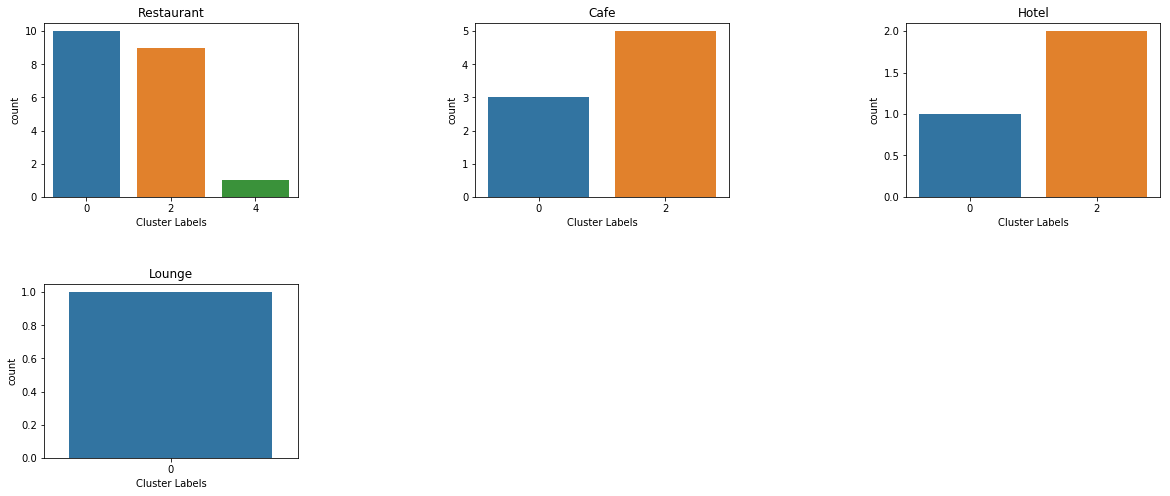

In [47]:
plt.figure(1,figsize=(20,8))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(231)
a.set_title('Restaurant')
sns.countplot(restaurant['Cluster Labels'])

a = plt.subplot(232)
a.set_title('Cafe')
sns.countplot(cafe['Cluster Labels'])

a = plt.subplot(233)
a.set_title('Hotel')
sns.countplot(hotel['Cluster Labels'])

a = plt.subplot(234)
a.set_title('Lounge')
sns.countplot(lounge['Cluster Labels'])


#### Cluster 0 Has the most number of restaurants, cafes, hotels and bars, while cluster 4 follows it. 

In [48]:
restaurant

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,프레스클럽,중구 세종대로 124,37.566529,126.977538,Chinese Restaurant,Restaurant,0
1,고려보쌈,중구 무교로 13,37.566978,126.978444,Korean Restaurant,Restaurant,2
2,동해도,시그너스빌딩 지하1층 (광화문점),37.566776,126.977459,Japanese Restaurant,Restaurant,0
3,뚜뿔등심,명동,37.566919,126.978859,Korean Restaurant,Restaurant,2
4,사보텐 Saboten,중구 세종대로20길 23 원창빌딩 1층 (무교점),37.567086,126.978528,Japanese Restaurant,Restaurant,2
5,우도일식,세종대로 124,37.567177,126.977972,Japanese Restaurant,Restaurant,0
6,육대장,세종대로20길 23 (서울시청점),37.567048,126.978512,Restaurant,Restaurant,2
7,금강산 오리요리전문점,중구 태평로1가 31번지 건설회관 지하1층,37.567092,126.978103,Asian Restaurant,Restaurant,0
8,비진도,중구 을지로 54-1,37.565845,126.983795,Seafood Restaurant,Restaurant,4
9,QooQoo,명동,37.566589,126.978278,Japanese Restaurant,Restaurant,2


In [49]:

cafe

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,행복 프러스 카페,명동,37.566534,126.977967,Café,Cafe,0
1,Ediya Coffee City Hall (이디야커피),중구 세종대로20길 23 (서울시청점),37.567050,126.978750,Coffee Shop,Cafe,2
2,Caffé bene,중구 세종대로 124 (프레스센터점),37.567370,126.977966,Coffee Shop,Cafe,0
3,행복플러스가게,명동,37.566467,126.978691,Café,Cafe,2
4,행복한 베이커리&카페,중구 세종대로 110 (서울도서관 5층),37.566283,126.977942,Coffee Shop,Cafe,2
5,행복플러스 신청사점,"태평로2가 31, 9층",37.566462,126.978612,Café,Cafe,2
6,Caffé bene,중구 태평로1가 25,37.566394,126.978531,Café,Cafe,2
7,Berri Fine,중구 태평로1가 25,37.567235,126.977707,Café,Cafe,0


In [50]:
hotel

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,프레시던트호텔,Chung Gu,37.566385,126.978948,Hotel,Hotel,2
1,ニュー国際ホテル,명동,37.567073,126.978032,Hotel,Hotel,0
2,the plaza oak,소공동,37.565722,126.978054,Hotel,Hotel,2


In [51]:
lounge

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,press club,프레스센터 F19 (태평로),37.566259,126.9776,Lounge,Lounge,0


In [52]:
Cluster_0 = venues[venues['Cluster Labels'] == 0].reset_index(drop = True)
Cluster_1 = venues[venues['Cluster Labels'] == 1].reset_index(drop = True)
Cluster_2 = venues[venues['Cluster Labels'] == 2].reset_index(drop = True)
Cluster_3 = venues[venues['Cluster Labels'] == 3].reset_index(drop = True)
Cluster_4 = venues[venues['Cluster Labels'] == 4].reset_index(drop = True)

## Visualise various venues in all the Clusters 

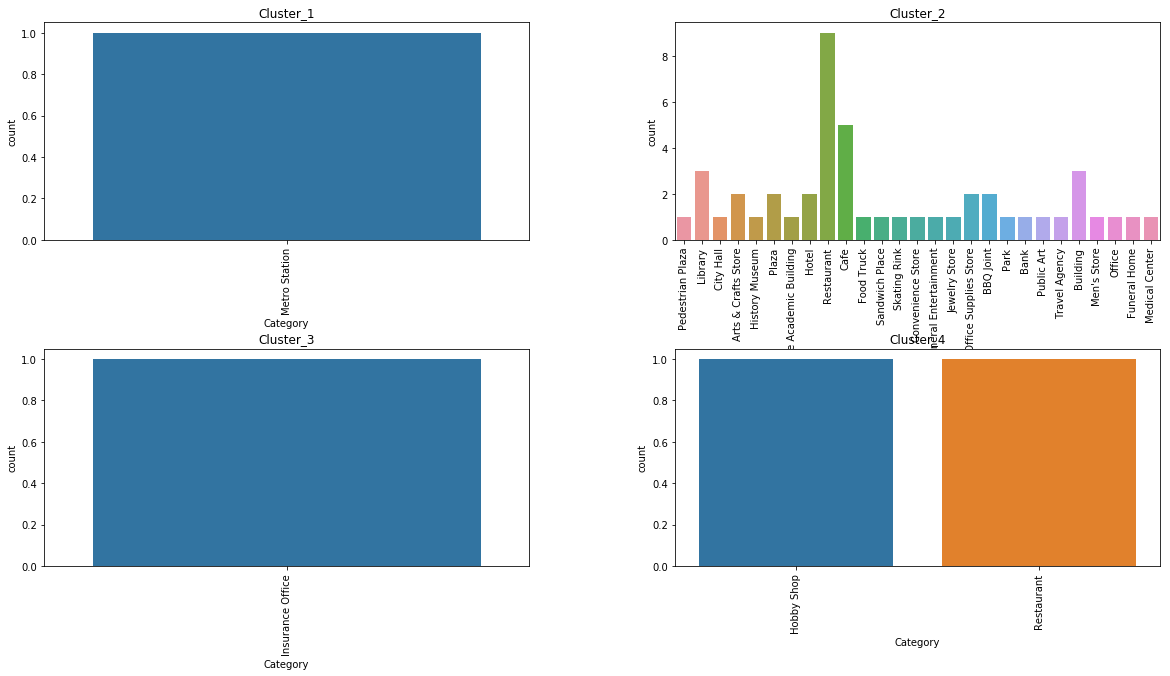

In [53]:
plt.figure(1,figsize=(20,10))

plt.subplots_adjust(hspace=0.5, wspace=0.3)

a = plt.subplot(221)
a.set_title('Cluster_1')
sns.countplot(Cluster_1['Category'])
plt.xticks(rotation=90)

a = plt.subplot(222)
a.set_title('Cluster_2')
sns.countplot(Cluster_2['Category'])
plt.xticks(rotation=90)

a = plt.subplot(223)
a.set_title('Cluster_3')
sns.countplot(Cluster_3['Category'])
plt.xticks(rotation=90)

a = plt.subplot(224)
a.set_title('Cluster_4')
sns.countplot(Cluster_4['Category'])

plt.xticks(rotation=90)
plt.show()

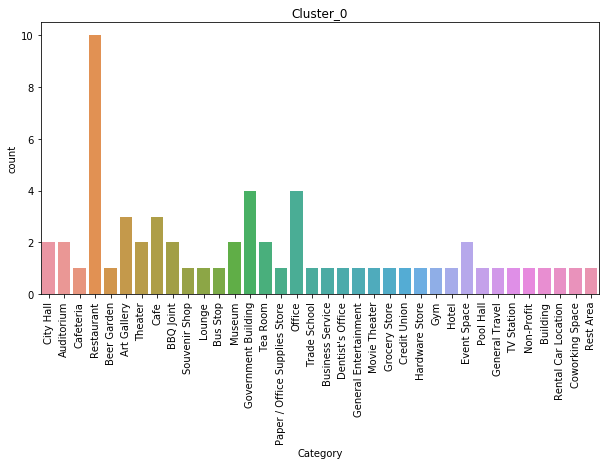

In [54]:
plt.figure(figsize = (10,5))
plt.title('Cluster_0')
sns.countplot(Cluster_0['Category'])
plt.xticks(rotation=90)
plt.show()

#### Cluster 0 has the most number of venues in all the clusters while cluster 2 follows behind.

In [64]:
Cluster_0

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Seoul Metropolitan Library (서울도서관),중구 세종대로 110 (옛 시청사),37.566196,126.977920,Library,Library,0
1,Seoul City Hall (서울특별시청),세종대로 110,37.566643,126.978357,City Hall,City Hall,0
2,Seoul Plaza (서울광장),중구 세종대로 110,37.565475,126.977937,Pedestrian Plaza,Pedestrian Plaza,0
3,시민청갤러리,중구 세종대로 110,37.566632,126.978019,Art Gallery,Art Gallery,0
4,서울시청 신청사 다목적홀,중구 세종대로 110,37.566564,126.977945,Auditorium,Auditorium,0
5,다동호프,명동,37.566534,126.977967,Beer Garden,Beer Garden,0
6,서울책방,명동,37.566460,126.978282,Library,Library,0
7,공정무역가게 지구마을,중구 세종대로 110,37.566588,126.978087,Arts & Crafts Store,Arts & Crafts Store,0
8,옛 시청사 복원 전시실,중구 세종대로 110 5층,37.566699,126.978333,History Museum,History Museum,0
9,옛날곱창,서울,37.566535,126.977969,BBQ Joint,BBQ Joint,0


In [65]:
Cluster_1

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Jongno 3(sam)-ga Stn. (종로3가역),"종로구 종로 지하 129 (1호선, 3호선, 5호선)",37.572555,126.991741,Metro Station,Metro Station,1


In [66]:
Cluster_2

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Seoul Kimchi Academy,명동길 48 7F,37.564114,126.985211,Hobby Shop,Hobby Shop,2
1,비진도,중구 을지로 54-1,37.565845,126.983795,Seafood Restaurant,Restaurant,2


In [67]:
Cluster_3

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,라이나생명,종로구 삼봉로 48,37.572015,126.980002,Insurance Office,Insurance Office,3


In [68]:
Cluster_4

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Seoul Citizens Hall (시민청),중구 세종대로 110,37.566718,126.977735,City Hall,City Hall,4
1,서울시청 시민청 태평홀,중구 세종대로 110 B2F,37.566716,126.977783,Auditorium,Auditorium,4
2,프레스클럽,중구 세종대로 124,37.566529,126.977538,Chinese Restaurant,Restaurant,4
3,서울시청 신청사 구내식당,중구 세종대로 110,37.566704,126.977825,Cafeteria,Cafeteria,4
4,서울특별시청 바스락홀,명동,37.566785,126.977673,Theater,Theater,4
5,서울시청 3층 대회의실,명동,37.566747,126.977951,City Hall,City Hall,4
6,Seoul Hall Of Urbanism & Architecture (서울도시건축전시관),중구 세종대로 119,37.566872,126.976818,Museum,Museum,4
7,"시청앞, 덕수궁 (02-286)","중구 세종대로 99 (시청 앞, 신한은행 방면)",37.566118,126.977106,Bus Stop,Bus Stop,4
8,"Korea Broadcast Advertising Corporation, KOBACO (한국방송광고진흥공사)","중구 세종대로 124 14, 16-18층",37.567308,126.977988,Government Building,Government Building,4
9,동해도,시그너스빌딩 지하1층 (광화문점),37.566776,126.977459,Japanese Restaurant,Restaurant,4


## Results and Discussion



Results and Discussion:
Based on our analysis to suggest recommended venues for short-trip travellers to Seoul, South Korea we have the following findings.
    -Cluster 1 has the most number of recommended venues and cluster 0 has the most number of venues to visit
    -We can visualize there are more recommended restaurants in Cluster 4, more cafes in Cluster 0, more hotels in Cluster 1 and more lounges in Cluster 3.
    -Cluster 0 Has the most number of restaurants, cafes, hotels and bars, while cluster 4 follows it
    -Cluster 0 has the most number of venues in all the clusters while cluster 2 follows behind
    
 Cluster 0 has the most number and variety of venues with also a number of hotels, restaurants, cafes and lounges. So short trip travellers can experience the real Seoul in Cluster 0.   



## Conclusion: 

The main objective and Purpose of this project was to identify good recoomended venues for short-trip travellers to visit in Seoul. This can narrow down the search time for travellers and also give them the best experience. The Foursquare Data has helped us in identifying the recommended venues visited by the earlier travellers and customers. Creating clusters among these venues helped us to segment and segregate the whole of Seoul area and provide a easy view for the travellers to decide. The final decison taken by the travellers can include the type of neighborhood and additional factors like commuting, prices and their lifestyle.

